<a href="https://colab.research.google.com/github/alti-tude/video-slide-matching/blob/master/tester.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Run This Once to Initialize the Drive

#### Right click and select save to My Drive

https://drive.google.com/open?id=1J84AcNchprI0DndeaTVFSUZWF2lMo5uu

In [2]:
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!mkdir '/content/gdrive/My Drive/data'
!cp -r '/content/gdrive/My Drive/Data' '/content/gdrive/My Drive/data'

# Test Generator

In [4]:
import os
root = '/content/gdrive/My Drive/data/Data/Dataset/'
testroot = '/'.join(root.split('/')[:-2]) + '/new_test/'

data = []
data_ind = []
c = 0

def load_tests(data, data_ind):
    for curdir in os.listdir(root):
        frames = []

        for imgs in os.listdir(root+curdir):
            if 'ppt' not in imgs:
                frames.append(root+curdir+'/'+imgs)
                data_ind.append({'ppt': root+curdir+'/ppt.jpg', 'frame':root+curdir+'/'+imgs})

        data.append({'ppt': root+curdir+'/ppt.jpg', 'frames':frames})
    

load_tests(data, data_ind)
print(data_ind[1])


{'ppt': '/content/gdrive/My Drive/data/Data/Dataset/03_7/ppt.jpg', 'frame': '/content/gdrive/My Drive/data/Data/Dataset/03_7/0.jpg'}


In [0]:
def cp(source, dest):
    ip = open(source, 'rb')
    data = b''
    while True:
        chunk = ip.read()
        if len(chunk) == 0:
            break
        data = data + chunk
    
    ip.close()
    
    op = open(dest, 'wb')
    op.write(data)

In [0]:
def write_sol(l, testroot):
    with open(testroot+'sol.txt', 'w') as sol: 
        for i in range(len(l)):
            sol.write("%s.jpg %s.jpg\n" %(i, l[i]['ppt'].split('/')[-2]))

In [0]:
from IPython.display import HTML, display

def progress(value, max=100):
    return HTML("""
        <progress
            value='{value}'
            max='{max}',
            style='width: 100%'
        >
            {value}
        </progress>
    """.format(value=value, max=max))



###  Rerun this for a new test

In [0]:
max_test_size = 30 
import random

def get_set(data_ind):
    global max_test_size
    testset_size = random.randint(10, max_test_size)
    testset_size = min(testset_size, len(data_ind)) 
    testset = random.sample(data_ind, testset_size)
    return testset,testset_size


In [0]:
import os

def gen_test(testroot, testset_size, testset):
    print("test size: "+str(testset_size))
    print(testroot)
    try:
        os.mkdir(testroot)
        os.mkdir(testroot+'frames/')
        os.mkdir(testroot+'ppts/')
    except Exception as e:
        print(e)
        for i in os.listdir(testroot+'frames/'):
            os.remove(testroot+'frames/'+i)
        for i in os.listdir(testroot+'ppts/'):
            os.remove(testroot+'ppts/'+i)

    out = display(progress(0, testset_size), display_id=True)

    for i in range(len(testset)):
        frame = testset[i]['frame']
        ppt = testset[i]['ppt']
        ppt_name = ppt.split('/')[-2]

        cp(ppt, testroot+'ppts/'+ppt_name+'.jpg')
        cp(frame, testroot+'frames/'+str(i)+'.jpg')
        out.update(progress(i+1, testset_size))
#         print(frame)

    write_sol(testset, testroot)



### Check OP

In [0]:
import os

def load_sol(testroot):
    solfilename = testroot+'sol.txt'

    sol = open(solfilename, 'r')
    acans = {}
    tot = 0
    while True:
        line = sol.readline()

        if line == '':
            break
        line = line.split(' ')
        
        tot += 1
        acans[line[0]] = line[1]  
    
    print("loaded: "+str(tot))
    return acans


In [0]:
def compare_sol(testroot, acans):
#     opfilename = input()
    opfilename = 'op.txt'
    opfilename = testroot+opfilename
    op = open(opfilename, 'r')
    ac = 0
    tot = 0
    errors = []
    while True:
        line = op.readline()

        if line == '':
            break

        line = line.split(' ')

        if len(line) !=2 :
            print('wrong format')
            break

        if acans[line[0]] == line[1]:
            ac+=1
        else:
            a = [line[0], line[1][:-1], acans[line[0]][:-1]]
            errors.append(a)
            print(a)
        tot+=1

    print(ac)
    print(ac/tot*100)
    return errors, ac, tot

In [0]:
import json
import os

dump_route = root+'../test_dump.txt'

max_test_size = 835 #@param {type:"slider", min:10, max:835, step:1}
iterations = 10 #@param {type:"integer"}
reset_flag = False #@param {type:"boolean"}

for i in range(iterations):
    if reset_flag:
        !rm -rf '{root}../errors'
        !rm -rf '{dump_route}'
        c = 0
        reset_flag = False
        
    if break_flag:
        break
        
    testset, testset_size = get_set(data_ind)
    gen_test(testroot, testset_size, testset)
    
    !python3 '{root}/../../../dsaa-project/main.py'
    
    acans = load_sol(testroot)
    errors, ac, tot = compare_sol(testroot, acans)
    
    if ac!=tot:
        c+=1
        with open(dump_route, 'a') as dump:
            dumpstr = json.dumps({"errors": errors, "ac":ac, "tot":tot})
            for j in range(len(errors)):
                print(errors[j])
                !mkdir -p '{root}../errors/test_{c}/err_{j}'
                !cp '{testroot}frames/{errors[j][0]}' '{root}../errors/test_{c}/err_{j}/frame.jpg'
                !cp '{testroot}ppts/{errors[j][1]}' '{root}../errors/test_{c}/err_{j}/incorrect_match.jpg'
                !cp '{testroot}ppts/{errors[j][2]}' '{root}../errors/test_{c}/err_{j}/correct_match.jpg'
            dump.write(dumpstr + '\n')
    
        
    

test size: 721
/content/gdrive/My Drive/data/Data/new_test/
[Errno 17] File exists: '/content/gdrive/My Drive/data/Data/new_test/'


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
1/721
2/721
3/721
4/721
5/721
6/721


In [0]:
import cv2 as cv
from matplotlib import pyplot as plt
def plotit(args):
  c = 1
  for i in args:
    image = cv.imread(i)
    plt.subplot(1, 3, c), plt.imshow(image, 'gray')
    c = c+1
  plt.show()

['/content/gdrive/My Drive/data/Data/Dataset/../errors/test_1/err_0/frame.jpg', '/content/gdrive/My Drive/data/Data/Dataset/../errors/test_1/err_0/incorrect_match.jpg', '/content/gdrive/My Drive/data/Data/Dataset/../errors/test_1/err_0/correct_match.jpg']


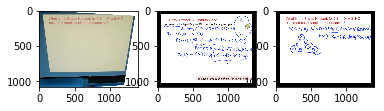


['/content/gdrive/My Drive/data/Data/Dataset/../errors/test_2/err_0/frame.jpg', '/content/gdrive/My Drive/data/Data/Dataset/../errors/test_2/err_0/incorrect_match.jpg', '/content/gdrive/My Drive/data/Data/Dataset/../errors/test_2/err_0/correct_match.jpg']


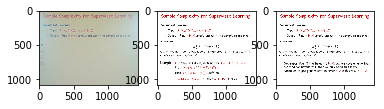

In [0]:
error_root=root+'../errors/'
for test in os.listdir(error_root):
    if test[0] == '.': continue
    for error in os.listdir(error_root+test+'/'):
        imgs = []
        for img in os.listdir(error_root+test+'/'+error+'/'):
            imgs.append(error_root+test+'/'+error+'/'+img)
        print(imgs)
        plotit(imgs)
        t = input()

In [0]:
s!python3 '{root}/../../../dsaa-project/main.py'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
caching frame
caching ppt
caching ppt
caching ppt
caching ppt
caching ppt
caching ppt
caching ppt
caching frame
caching frame
caching frame
caching frame
caching frame
caching frame


In [0]:
acans = load_sol(testroot)
compare_sol(testroot, acans)

loaded: 19
op3.txt
19
100.0


In [0]:
testset, testset_size = get_set(data_ind)
gen_test(testroot, testset_size, testset)

test size: 7
/content/gdrive/My Drive/data/Data/new_test/
[Errno 17] File exists: '/content/gdrive/My Drive/data/Data/new_test/'


In [0]:
c = 5